# Data Analysis
## Class 13
#### October 23th

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
reporte = pd.read_excel('Reporte_Hist_Viaje_11_05_09.17.xls', header=1, sheet_name=0)
fallas = pd.read_excel('Reporte_Hist_Viaje_11_05_09.17.xls', header=0, sheet_name=1)

In [3]:
reporte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2822 entries, 0 to 2821
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Altitud (m)              2822 non-null   float64
 1   Temp Refrigerante (°C)   813 non-null    float64
 2   Temp Aceite (°C)         813 non-null    float64
 3   Pres Aceite (kPa)        2822 non-null   float64
 4   Pres Turbo (kPa)         2822 non-null   float64
 5   Velocidad (Km/h)         2822 non-null   float64
 6   Revoluciones (rpm)       2822 non-null   int64  
 7   Combustible (l)          2822 non-null   float64
 8   Factor Carga (%)         2822 non-null   float64
 9   Fecha                    2822 non-null   object 
 10  km recorridos            2822 non-null   float64
 11  Ignición                 2822 non-null   object 
 12  Combustible x Viaje (l)  2822 non-null   float64
 13  Rendimiento (km/l)       2822 non-null   float64
dtypes: float64(11), int64(1)

In [4]:
reporte.iloc[:,1].isnull().sum()/len(reporte)*100

71.19064493267186

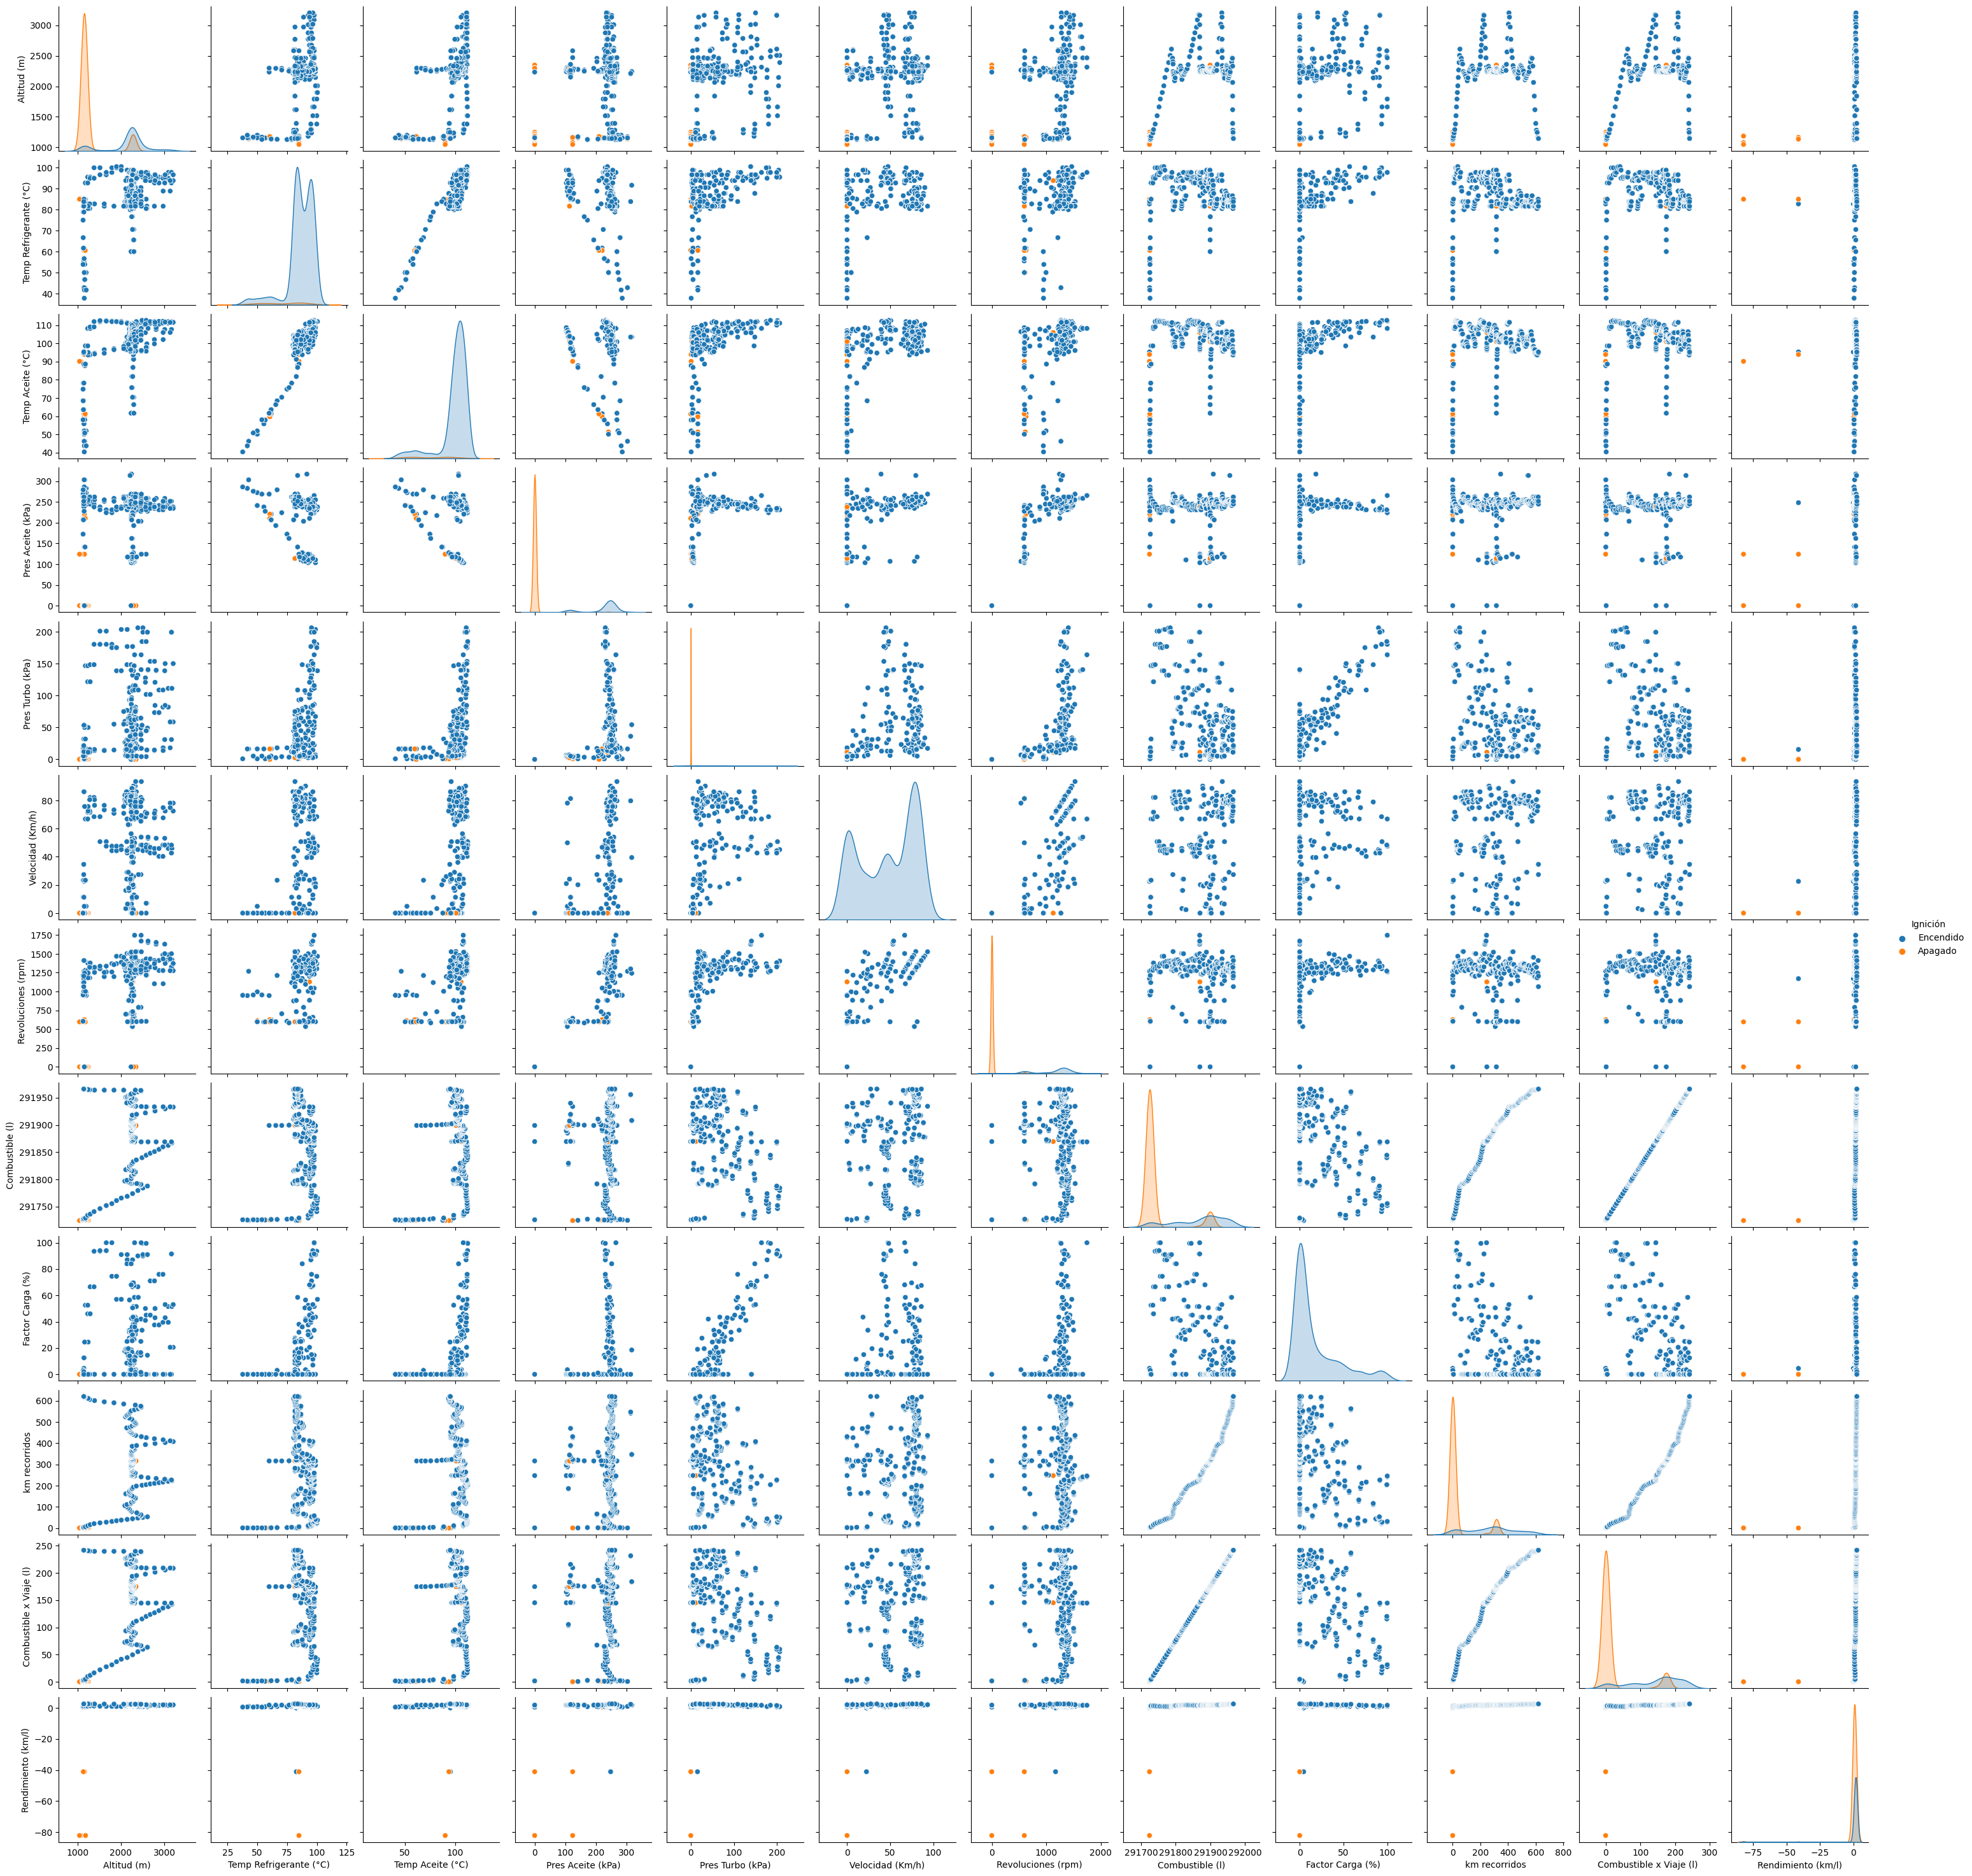

In [5]:
sns.pairplot(reporte, hue="Ignición")

In [6]:
pd.to_datetime(reporte.Fecha)

0      2016-04-23 21:32:49
1      2016-04-23 21:33:53
2      2016-04-23 21:34:53
3      2016-04-23 21:35:53
4      2016-04-23 21:36:53
               ...        
2817   2016-04-25 20:52:13
2818   2016-04-25 20:53:15
2819   2016-04-25 20:54:15
2820   2016-04-25 20:55:15
2821   2016-04-25 20:56:15
Name: Fecha, Length: 2822, dtype: datetime64[ns]

In [7]:
reporte.head()

Altitud (m)  Temp Refrigerante (°C)  Temp Aceite (°C)  Pres Aceite (kPa)  \
0       1139.5                   82.77             95.27              248.4   
1       1147.5                   82.77             95.27              248.4   
2       1147.5                   82.77             95.27              248.4   
3       1147.5                   82.77             95.27              248.4   
4       1147.5                   85.00             93.88              124.2   

   Pres Turbo (kPa)  Velocidad (Km/h)  Revoluciones (rpm)  Combustible (l)  \
0            15.516             22.54                1171    291724.366084   
1            15.516             22.54                1171    291724.366084   
2            15.516             22.54                1171    291724.366084   
3            15.516             22.54                1171    291724.366084   
4             0.862              0.00                 597    291724.366084   

   Factor Carga (%)                Fecha  km recorridos   Ignición  \
0               4.5  23/04/2016 21:32:49           0.00  Encendido   
1               4.5  23/04/2016 21:33:53           0.16  Encendido   
2               4.5  23/04/2016 21:34:53           0.16  Encendido   
3               4.5  23/04/2016 21:35:53           0.16  Encendido   
4               0.0  23/04/2016 21:36:53           0.16  Encendido   

   Combustible x Viaje (l)  Rendimiento (km/l)  
0                 0.000000            0.000000  
1                -0.003916          -41.100704  
2                -0.003916          -41.100704  
3                -0.003916          -41.100704  
4                -0.003916          -41.100704

In [8]:
reporte['datetime'] = pd.to_datetime(reporte.Fecha)

In [9]:
reporte.set_index('datetime', inplace=True)

In [10]:
reporte.head()

Altitud (m)  Temp Refrigerante (°C)  Temp Aceite (°C)  \
datetime                                                                     
2016-04-23 21:32:49       1139.5                   82.77             95.27   
2016-04-23 21:33:53       1147.5                   82.77             95.27   
2016-04-23 21:34:53       1147.5                   82.77             95.27   
2016-04-23 21:35:53       1147.5                   82.77             95.27   
2016-04-23 21:36:53       1147.5                   85.00             93.88   

                     Pres Aceite (kPa)  Pres Turbo (kPa)  Velocidad (Km/h)  \
datetime                                                                     
2016-04-23 21:32:49              248.4            15.516             22.54   
2016-04-23 21:33:53              248.4            15.516             22.54   
2016-04-23 21:34:53              248.4            15.516             22.54   
2016-04-23 21:35:53              248.4            15.516             22.54   
2016-04-23 21:36:53              124.2             0.862              0.00   

                     Revoluciones (rpm)  Combustible (l)  Factor Carga (%)  \
datetime                                                                     
2016-04-23 21:32:49                1171    291724.366084               4.5   
2016-04-23 21:33:53                1171    291724.366084               4.5   
2016-04-23 21:34:53                1171    291724.366084               4.5   
2016-04-23 21:35:53                1171    291724.366084               4.5   
2016-04-23 21:36:53                 597    291724.366084               0.0   

                                   Fecha  km recorridos   Ignición  \
datetime                                                             
2016-04-23 21:32:49  23/04/2016 21:32:49           0.00  Encendido   
2016-04-23 21:33:53  23/04/2016 21:33:53           0.16  Encendido   
2016-04-23 21:34:53  23/04/2016 21:34:53           0.16  Encendido   
2016-04-23 21:35:53  23/04/2016 21:35:53           0.16  Encendido   
2016-04-23 21:36:53  23/04/2016 21:36:53           0.16  Encendido   

                     Combustible x Viaje (l)  Rendimiento (km/l)  
datetime                                                          
2016-04-23 21:32:49                 0.000000            0.000000  
2016-04-23 21:33:53                -0.003916          -41.100704  
2016-04-23 21:34:53                -0.003916          -41.100704  
2016-04-23 21:35:53                -0.003916          -41.100704  
2016-04-23 21:36:53                -0.003916          -41.100704

In [11]:
reporte.loc['2016-04-23 21' : '2016-04-23 23']

Altitud (m)  Temp Refrigerante (°C)  Temp Aceite (°C)  \
datetime                                                                     
2016-04-23 21:32:49       1139.5                   82.77             95.27   
2016-04-23 21:33:53       1147.5                   82.77             95.27   
2016-04-23 21:34:53       1147.5                   82.77             95.27   
2016-04-23 21:35:53       1147.5                   82.77             95.27   
2016-04-23 21:36:53       1147.5                   85.00             93.88   
...                          ...                     ...               ...   
2016-04-23 23:55:38       1157.6                     NaN               NaN   
2016-04-23 23:56:38       1157.6                     NaN               NaN   
2016-04-23 23:57:38       1157.6                     NaN               NaN   
2016-04-23 23:58:39       1127.0                     NaN               NaN   
2016-04-23 23:59:39       1127.0                     NaN               NaN   

                     Pres Aceite (kPa)  Pres Turbo (kPa)  Velocidad (Km/h)  \
datetime                                                                     
2016-04-23 21:32:49              248.4            15.516             22.54   
2016-04-23 21:33:53              248.4            15.516             22.54   
2016-04-23 21:34:53              248.4            15.516             22.54   
2016-04-23 21:35:53              248.4            15.516             22.54   
2016-04-23 21:36:53              124.2             0.862              0.00   
...                                ...               ...               ...   
2016-04-23 23:55:38                0.0             0.000              0.00   
2016-04-23 23:56:38                0.0             0.000              0.00   
2016-04-23 23:57:38                0.0             0.000              0.00   
2016-04-23 23:58:39                0.0             0.000              0.00   
2016-04-23 23:59:39                0.0             0.000              0.00   

                     Revoluciones (rpm)  Combustible (l)  Factor Carga (%)  \
datetime                                                                     
2016-04-23 21:32:49                1171    291724.366084               4.5   
2016-04-23 21:33:53                1171    291724.366084               4.5   
2016-04-23 21:34:53                1171    291724.366084               4.5   
2016-04-23 21:35:53                1171    291724.366084               4.5   
2016-04-23 21:36:53                 597    291724.366084               0.0   
...                                 ...              ...               ...   
2016-04-23 23:55:38                   0    291724.877115               0.0   
2016-04-23 23:56:38                   0    291724.877115               0.0   
2016-04-23 23:57:38                   0    291724.877115               0.0   
2016-04-23 23:58:39                   0    291724.877115               0.0   
2016-04-23 23:59:39                   0    291724.877115               0.0   

                                   Fecha  km recorridos   Ignición  \
datetime                                                             
2016-04-23 21:32:49  23/04/2016 21:32:49           0.00  Encendido   
2016-04-23 21:33:53  23/04/2016 21:33:53           0.16  Encendido   
2016-04-23 21:34:53  23/04/2016 21:34:53           0.16  Encendido   
2016-04-23 21:35:53  23/04/2016 21:35:53           0.16  Encendido   
2016-04-23 21:36:53  23/04/2016 21:36:53           0.16  Encendido   
...                                  ...            ...        ...   
2016-04-23 23:55:38  23/04/2016 23:55:38           0.48    Apagado   
2016-04-23 23:56:38  23/04/2016 23:56:38           0.48    Apagado   
2016-04-23 23:57:38  23/04/2016 23:57:38           0.48    Apagado   
2016-04-23 23:58:39  23/04/2016 23:58:39           0.48    Apagado   
2016-04-23 23:59:39  23/04/2016 23:59:39           0.48    Apagado   

                     Combustible x Viaje (l)  Rendimiento (km/l) 

In [12]:
reporte.plot()

<AxesSubplot: xlabel='datetime'>

<AxesSubplot: xlabel='datetime'>

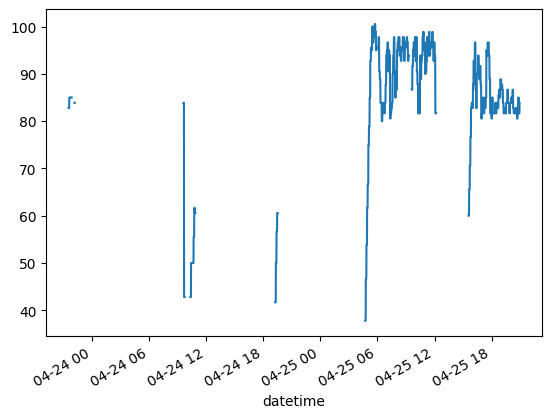

In [13]:
reporte.loc[:, 'Temp Refrigerante (°C)'].plot()

<AxesSubplot: xlabel='datetime'>

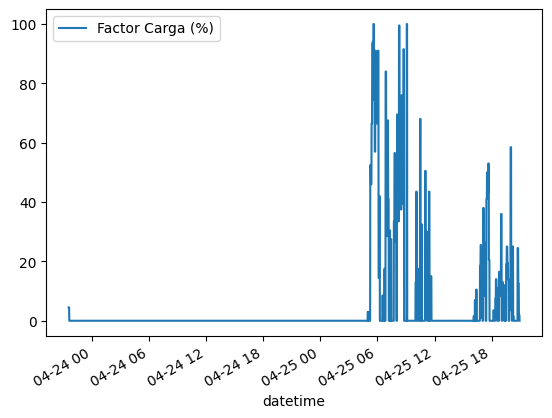

In [14]:
reporte.loc[:, ['Factor Carga (%)']].plot()

<AxesSubplot: xlabel='datetime'>

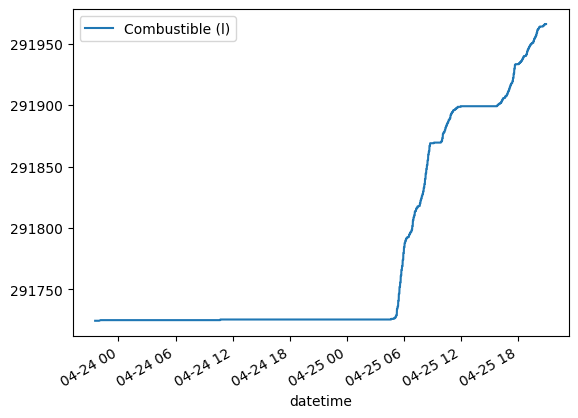

In [15]:
reporte.loc[:, ['Combustible (l)']].plot()

<AxesSubplot: xlabel='datetime'>

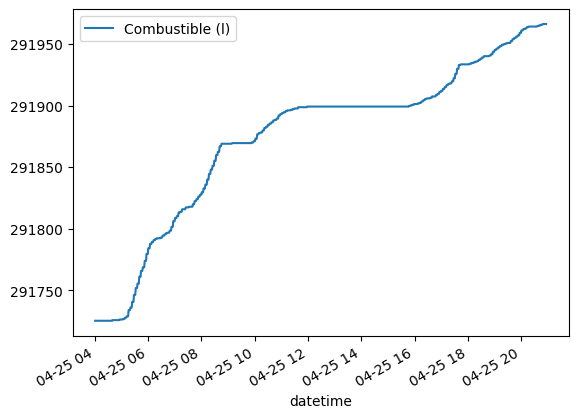

In [16]:
reporte.loc['2016-04-25 04' :, ['Combustible (l)']].plot()

<AxesSubplot: xlabel='datetime'>

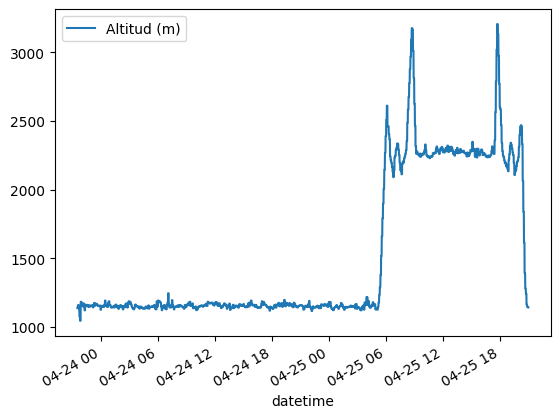

In [17]:
reporte.loc[:, ['Altitud (m)']].plot()

In [18]:
reporte.loc[:, ['Velocidad (Km/h)']].plot()

<AxesSubplot: xlabel='datetime'>

In [19]:
fallas

Unidad Código  \
0                 195  T9041   
1   Falla no definida  T9041   
2                 144  T9041   
3                1117  T9041   
4                 123  T9041   
..                ...    ...   
61               2372  T9041   
62                153  T9041   
63                195  T9041   
64                123  T9041   
65               1117  T9041   

                                          Descripción             Fecha  
0   Circuito del Sensor de Nivel de Refrigerante 1...  25/04/2016 15:34  
1   Falla generica frenos.-Vínculo de datos SAE J1...  25/04/2016 15:34  
2   Circuito 1 del Sensor de Temperatura de Refrig...  25/04/2016 15:34  
3   Suministro de Energía Perdido Con Conexión del...  25/04/2016 15:34  
4   Circuito del Sensor de Presión 1 del Múltiple ...  25/04/2016 15:34  
..                                                ...               ...  
61  Presión Diferencial del Filtro de Combustible ...  23/04/2016 21:48  
62  Circuito del Sensor de Temperatura 1 del Múlti...  23/04/2016 21:48  
63  Circuito del Sensor de Nivel de Refrigerante 1...  23/04/2016 21:48  
64  Circuito del Sensor de Presión 1 del Múltiple ...  23/04/2016 21:48  
65  Suministro de Energía Perdido Con Conexión del...  23/04/2016 21:48  

[66 rows x 4 columns]

# Ejercicio reporte:

1. Modificar los encabezados del DF para simplificar los nombres de los atributos, es decir homogeneizar los nombres de las columnas (eliminar caracteres especiales, espacios, etc.)
2. Hacer DF compañia que indique el nuevo nombre con el nombre original, este debera tener como indice el nuevo nombre de las columnas y su columna el nombre original
3. Generar nuevas columnas con la información de la fecha:
* año
* mes
* dia
* hora
* minuto
* segundo
4. Eliminar las columnas que tienen información duplicada
5. Crear una columna Estado: que utilice la informacion de Velocidad y de Ignición para determinar el estado de operacion 
* A: ignicion apagado y velocidad cero 
* ED: ignicion encendido velocidad cero
* EM: ignicion encendidio velocidad mayo a cero
6. Determinar la frecuencia de muestreo, es decir cada cuanto se tiene un registro
7. Identificar valores faltantes, y tratar de determinar porque faltan
8. Rellenar valores faltantes con base en algun criterio razonable derivado de la exploracion de los datos

In [20]:
reporte.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2822 entries, 2016-04-23 21:32:49 to 2016-04-25 20:56:15
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Altitud (m)              2822 non-null   float64
 1   Temp Refrigerante (°C)   813 non-null    float64
 2   Temp Aceite (°C)         813 non-null    float64
 3   Pres Aceite (kPa)        2822 non-null   float64
 4   Pres Turbo (kPa)         2822 non-null   float64
 5   Velocidad (Km/h)         2822 non-null   float64
 6   Revoluciones (rpm)       2822 non-null   int64  
 7   Combustible (l)          2822 non-null   float64
 8   Factor Carga (%)         2822 non-null   float64
 9   Fecha                    2822 non-null   object 
 10  km recorridos            2822 non-null   float64
 11  Ignición                 2822 non-null   object 
 12  Combustible x Viaje (l)  2822 non-null   float64
 13  Rendimiento (km/l)       2822 non-null   f

1. Modificar los encabezados del DF para simplificar los nombres de los atributos, es decir homogeneizar los nombres de las columnas (eliminar caracteres especiales, espacios, etc.)

Se separan los nombres donde haya un ( y nos quedamos con la parte de la izquierda

Se reemplazan los espacios ' ' por no espacios ''

y se reemplazan las ó por o

In [21]:
original_columns = reporte.columns.copy()
reporte = reporte.set_axis(reporte.columns.str.split('(').str[0].str.replace(' ', '').str.replace('ó', 'o'), axis=1)
reporte.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2822 entries, 2016-04-23 21:32:49 to 2016-04-25 20:56:15
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Altitud            2822 non-null   float64
 1   TempRefrigerante   813 non-null    float64
 2   TempAceite         813 non-null    float64
 3   PresAceite         2822 non-null   float64
 4   PresTurbo          2822 non-null   float64
 5   Velocidad          2822 non-null   float64
 6   Revoluciones       2822 non-null   int64  
 7   Combustible        2822 non-null   float64
 8   FactorCarga        2822 non-null   float64
 9   Fecha              2822 non-null   object 
 10  kmrecorridos       2822 non-null   float64
 11  Ignicion           2822 non-null   object 
 12  CombustiblexViaje  2822 non-null   float64
 13  Rendimiento        2822 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 395.2+ KB


2. Hacer DF compañia que indique el nuevo nombre con el nombre original, este debera tener como indice el nuevo nombre de las columnas y su columna el nombre original

In [22]:
nueva_column = reporte.columns.copy()

In [23]:
compania = pd.DataFrame(columns= original_columns, index=nueva_column)
compania

Altitud (m) Temp Refrigerante (°C) Temp Aceite (°C)  \
Altitud                   NaN                    NaN              NaN   
TempRefrigerante          NaN                    NaN              NaN   
TempAceite                NaN                    NaN              NaN   
PresAceite                NaN                    NaN              NaN   
PresTurbo                 NaN                    NaN              NaN   
Velocidad                 NaN                    NaN              NaN   
Revoluciones              NaN                    NaN              NaN   
Combustible               NaN                    NaN              NaN   
FactorCarga               NaN                    NaN              NaN   
Fecha                     NaN                    NaN              NaN   
kmrecorridos              NaN                    NaN              NaN   
Ignicion                  NaN                    NaN              NaN   
CombustiblexViaje         NaN                    NaN              NaN   
Rendimiento               NaN                    NaN              NaN   

                  Pres Aceite (kPa) Pres Turbo (kPa) Velocidad (Km/h)  \
Altitud                         NaN              NaN              NaN   
TempRefrigerante                NaN              NaN              NaN   
TempAceite                      NaN              NaN              NaN   
PresAceite                      NaN              NaN              NaN   
PresTurbo                       NaN              NaN              NaN   
Velocidad                       NaN              NaN              NaN   
Revoluciones                    NaN              NaN              NaN   
Combustible                     NaN              NaN              NaN   
FactorCarga                     NaN              NaN              NaN   
Fecha                           NaN              NaN              NaN   
kmrecorridos                    NaN              NaN              NaN   
Ignicion                        NaN              NaN              NaN   
CombustiblexViaje               NaN              NaN              NaN   
Rendimiento                     NaN              NaN              NaN   

                  Revoluciones (rpm) Combustible (l) Factor Carga (%) Fecha  \
Altitud                          NaN             NaN              NaN   NaN   
TempRefrigerante                 NaN             NaN              NaN   NaN   
TempAceite                       NaN             NaN              NaN   NaN   
PresAceite                       NaN             NaN              NaN   NaN   
PresTurbo                        NaN             NaN              NaN   NaN   
Velocidad                        NaN             NaN              NaN   NaN   
Revoluciones                     NaN             NaN              NaN   NaN   
Combustible                      NaN             NaN              NaN   NaN   
FactorCarga                      NaN             NaN              NaN   NaN   
Fecha                            NaN             NaN              NaN   NaN   
kmrecorridos                     NaN             NaN              NaN   NaN   
Ignicion                         NaN             NaN              NaN   NaN   
CombustiblexViaje                NaN             NaN              NaN   NaN   
Rendimiento                      NaN             NaN              NaN   NaN   

                  km recorridos Ignición Combustible x Viaje (l)  \
Altitud                     NaN      NaN                     NaN   
TempRefrigerante            NaN      NaN                     NaN   
TempAceite                  NaN      NaN                     NaN   
PresAceite                  NaN      NaN                     NaN   
PresTurbo                   NaN      NaN                     NaN   
Velocidad                   NaN      NaN                     NaN   
Revoluciones                NaN      NaN                     NaN   
Combustible                 NaN      NaN                     NaN   
FactorCarga                 

3. Generar nuevas columnas con la información de la fecha:
* año
* mes
* dia
* hora
* minuto
* segundo

In [24]:
reporte['Año'] = reporte['Fecha'].str.split('/').str[2].str.split(' ').str[0].to_frame()
reporte.head()

Altitud  TempRefrigerante  TempAceite  PresAceite  \
datetime                                                                 
2016-04-23 21:32:49   1139.5             82.77       95.27       248.4   
2016-04-23 21:33:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:34:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:35:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:36:53   1147.5             85.00       93.88       124.2   

                     PresTurbo  Velocidad  Revoluciones    Combustible  \
datetime                                                                 
2016-04-23 21:32:49     15.516      22.54          1171  291724.366084   
2016-04-23 21:33:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:34:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:35:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:36:53      0.862       0.00           597  291724.366084   

                     FactorCarga                Fecha  kmrecorridos  \
datetime                                                              
2016-04-23 21:32:49          4.5  23/04/2016 21:32:49          0.00   
2016-04-23 21:33:53          4.5  23/04/2016 21:33:53          0.16   
2016-04-23 21:34:53          4.5  23/04/2016 21:34:53          0.16   
2016-04-23 21:35:53          4.5  23/04/2016 21:35:53          0.16   
2016-04-23 21:36:53          0.0  23/04/2016 21:36:53          0.16   

                      Ignicion  CombustiblexViaje  Rendimiento   Año  
datetime                                                              
2016-04-23 21:32:49  Encendido           0.000000     0.000000  2016  
2016-04-23 21:33:53  Encendido          -0.003916   -41.100704  2016  
2016-04-23 21:34:53  Encendido          -0.003916   -41.100704  2016  
2016-04-23 21:35:53  Encendido          -0.003916   -41.100704  2016  
2016-04-23 21:36:53  Encendido          -0.003916   -41.100704  2016

In [25]:
reporte['Mes'] = reporte['Fecha'].str.split('/').str[1].to_frame()
reporte.head()

Altitud  TempRefrigerante  TempAceite  PresAceite  \
datetime                                                                 
2016-04-23 21:32:49   1139.5             82.77       95.27       248.4   
2016-04-23 21:33:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:34:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:35:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:36:53   1147.5             85.00       93.88       124.2   

                     PresTurbo  Velocidad  Revoluciones    Combustible  \
datetime                                                                 
2016-04-23 21:32:49     15.516      22.54          1171  291724.366084   
2016-04-23 21:33:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:34:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:35:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:36:53      0.862       0.00           597  291724.366084   

                     FactorCarga                Fecha  kmrecorridos  \
datetime                                                              
2016-04-23 21:32:49          4.5  23/04/2016 21:32:49          0.00   
2016-04-23 21:33:53          4.5  23/04/2016 21:33:53          0.16   
2016-04-23 21:34:53          4.5  23/04/2016 21:34:53          0.16   
2016-04-23 21:35:53          4.5  23/04/2016 21:35:53          0.16   
2016-04-23 21:36:53          0.0  23/04/2016 21:36:53          0.16   

                      Ignicion  CombustiblexViaje  Rendimiento   Año Mes  
datetime                                                                  
2016-04-23 21:32:49  Encendido           0.000000     0.000000  2016  04  
2016-04-23 21:33:53  Encendido          -0.003916   -41.100704  2016  04  
2016-04-23 21:34:53  Encendido          -0.003916   -41.100704  2016  04  
2016-04-23 21:35:53  Encendido          -0.003916   -41.100704  2016  04  
2016-04-23 21:36:53  Encendido          -0.003916   -41.100704  2016  04

In [26]:
reporte['Dia'] = reporte['Fecha'].str.split('/').str[0].to_frame()
reporte.head()

Altitud  TempRefrigerante  TempAceite  PresAceite  \
datetime                                                                 
2016-04-23 21:32:49   1139.5             82.77       95.27       248.4   
2016-04-23 21:33:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:34:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:35:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:36:53   1147.5             85.00       93.88       124.2   

                     PresTurbo  Velocidad  Revoluciones    Combustible  \
datetime                                                                 
2016-04-23 21:32:49     15.516      22.54          1171  291724.366084   
2016-04-23 21:33:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:34:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:35:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:36:53      0.862       0.00           597  291724.366084   

                     FactorCarga                Fecha  kmrecorridos  \
datetime                                                              
2016-04-23 21:32:49          4.5  23/04/2016 21:32:49          0.00   
2016-04-23 21:33:53          4.5  23/04/2016 21:33:53          0.16   
2016-04-23 21:34:53          4.5  23/04/2016 21:34:53          0.16   
2016-04-23 21:35:53          4.5  23/04/2016 21:35:53          0.16   
2016-04-23 21:36:53          0.0  23/04/2016 21:36:53          0.16   

                      Ignicion  CombustiblexViaje  Rendimiento   Año Mes Dia  
datetime                                                                      
2016-04-23 21:32:49  Encendido           0.000000     0.000000  2016  04  23  
2016-04-23 21:33:53  Encendido          -0.003916   -41.100704  2016  04  23  
2016-04-23 21:34:53  Encendido          -0.003916   -41.100704  2016  04  23  
2016-04-23 21:35:53  Encendido          -0.003916   -41.100704  2016  04  23  
2016-04-23 21:36:53  Encendido          -0.003916   -41.100704  2016  04  23

In [27]:
reporte['Hora'] = reporte['Fecha'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[0].to_frame()
reporte.head()

Altitud  TempRefrigerante  TempAceite  PresAceite  \
datetime                                                                 
2016-04-23 21:32:49   1139.5             82.77       95.27       248.4   
2016-04-23 21:33:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:34:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:35:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:36:53   1147.5             85.00       93.88       124.2   

                     PresTurbo  Velocidad  Revoluciones    Combustible  \
datetime                                                                 
2016-04-23 21:32:49     15.516      22.54          1171  291724.366084   
2016-04-23 21:33:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:34:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:35:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:36:53      0.862       0.00           597  291724.366084   

                     FactorCarga                Fecha  kmrecorridos  \
datetime                                                              
2016-04-23 21:32:49          4.5  23/04/2016 21:32:49          0.00   
2016-04-23 21:33:53          4.5  23/04/2016 21:33:53          0.16   
2016-04-23 21:34:53          4.5  23/04/2016 21:34:53          0.16   
2016-04-23 21:35:53          4.5  23/04/2016 21:35:53          0.16   
2016-04-23 21:36:53          0.0  23/04/2016 21:36:53          0.16   

                      Ignicion  CombustiblexViaje  Rendimiento   Año Mes Dia  \
datetime                                                                       
2016-04-23 21:32:49  Encendido           0.000000     0.000000  2016  04  23   
2016-04-23 21:33:53  Encendido          -0.003916   -41.100704  2016  04  23   
2016-04-23 21:34:53  Encendido          -0.003916   -41.100704  2016  04  23   
2016-04-23 21:35:53  Encendido          -0.003916   -41.100704  2016  04  23   
2016-04-23 21:36:53  Encendido          -0.003916   -41.100704  2016  04  23   

                    Hora  
datetime                  
2016-04-23 21:32:49   21  
2016-04-23 21:33:53   21  
2016-04-23 21:34:53   21  
2016-04-23 21:35:53   21  
2016-04-23 21:36:53   21

In [28]:
reporte['Minuto'] = reporte['Fecha'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[1].to_frame()
reporte.head()

Altitud  TempRefrigerante  TempAceite  PresAceite  \
datetime                                                                 
2016-04-23 21:32:49   1139.5             82.77       95.27       248.4   
2016-04-23 21:33:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:34:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:35:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:36:53   1147.5             85.00       93.88       124.2   

                     PresTurbo  Velocidad  Revoluciones    Combustible  \
datetime                                                                 
2016-04-23 21:32:49     15.516      22.54          1171  291724.366084   
2016-04-23 21:33:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:34:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:35:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:36:53      0.862       0.00           597  291724.366084   

                     FactorCarga                Fecha  kmrecorridos  \
datetime                                                              
2016-04-23 21:32:49          4.5  23/04/2016 21:32:49          0.00   
2016-04-23 21:33:53          4.5  23/04/2016 21:33:53          0.16   
2016-04-23 21:34:53          4.5  23/04/2016 21:34:53          0.16   
2016-04-23 21:35:53          4.5  23/04/2016 21:35:53          0.16   
2016-04-23 21:36:53          0.0  23/04/2016 21:36:53          0.16   

                      Ignicion  CombustiblexViaje  Rendimiento   Año Mes Dia  \
datetime                                                                       
2016-04-23 21:32:49  Encendido           0.000000     0.000000  2016  04  23   
2016-04-23 21:33:53  Encendido          -0.003916   -41.100704  2016  04  23   
2016-04-23 21:34:53  Encendido          -0.003916   -41.100704  2016  04  23   
2016-04-23 21:35:53  Encendido          -0.003916   -41.100704  2016  04  23   
2016-04-23 21:36:53  Encendido          -0.003916   -41.100704  2016  04  23   

                    Hora Minuto  
datetime                         
2016-04-23 21:32:49   21     32  
2016-04-23 21:33:53   21     33  
2016-04-23 21:34:53   21     34  
2016-04-23 21:35:53   21     35  
2016-04-23 21:36:53   21     36

In [29]:
reporte['Segundo'] = reporte['Fecha'].str.split('/').str[2].str.split(' ').str[1].str.split(':').str[2].to_frame()
reporte.head()

Altitud  TempRefrigerante  TempAceite  PresAceite  \
datetime                                                                 
2016-04-23 21:32:49   1139.5             82.77       95.27       248.4   
2016-04-23 21:33:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:34:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:35:53   1147.5             82.77       95.27       248.4   
2016-04-23 21:36:53   1147.5             85.00       93.88       124.2   

                     PresTurbo  Velocidad  Revoluciones    Combustible  \
datetime                                                                 
2016-04-23 21:32:49     15.516      22.54          1171  291724.366084   
2016-04-23 21:33:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:34:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:35:53     15.516      22.54          1171  291724.366084   
2016-04-23 21:36:53      0.862       0.00           597  291724.366084   

                     FactorCarga                Fecha  kmrecorridos  \
datetime                                                              
2016-04-23 21:32:49          4.5  23/04/2016 21:32:49          0.00   
2016-04-23 21:33:53          4.5  23/04/2016 21:33:53          0.16   
2016-04-23 21:34:53          4.5  23/04/2016 21:34:53          0.16   
2016-04-23 21:35:53          4.5  23/04/2016 21:35:53          0.16   
2016-04-23 21:36:53          0.0  23/04/2016 21:36:53          0.16   

                      Ignicion  CombustiblexViaje  Rendimiento   Año Mes Dia  \
datetime                                                                       
2016-04-23 21:32:49  Encendido           0.000000     0.000000  2016  04  23   
2016-04-23 21:33:53  Encendido          -0.003916   -41.100704  2016  04  23   
2016-04-23 21:34:53  Encendido          -0.003916   -41.100704  2016  04  23   
2016-04-23 21:35:53  Encendido          -0.003916   -41.100704  2016  04  23   
2016-04-23 21:36:53  Encendido          -0.003916   -41.100704  2016  04  23   

                    Hora Minuto Segundo  
datetime                                 
2016-04-23 21:32:49   21     32      49  
2016-04-23 21:33:53   21     33      53  
2016-04-23 21:34:53   21     34      53  
2016-04-23 21:35:53   21     35      53  
2016-04-23 21:36:53   21     36      53

In [30]:
reporte.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2822 entries, 2016-04-23 21:32:49 to 2016-04-25 20:56:15
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Altitud            2822 non-null   float64
 1   TempRefrigerante   813 non-null    float64
 2   TempAceite         813 non-null    float64
 3   PresAceite         2822 non-null   float64
 4   PresTurbo          2822 non-null   float64
 5   Velocidad          2822 non-null   float64
 6   Revoluciones       2822 non-null   int64  
 7   Combustible        2822 non-null   float64
 8   FactorCarga        2822 non-null   float64
 9   Fecha              2822 non-null   object 
 10  kmrecorridos       2822 non-null   float64
 11  Ignicion           2822 non-null   object 
 12  CombustiblexViaje  2822 non-null   float64
 13  Rendimiento        2822 non-null   float64
 14  Año                2822 non-null   object 
 15  Mes                2822 non-null   o

4. Eliminar las columnas que tienen información duplicada

In [31]:
sns.pairplot(reporte, hue="Ignicion")

CombustiblexViaje es el atributo que da información duplicada

In [32]:
reporte = reporte.drop('CombustiblexViaje', axis=1)

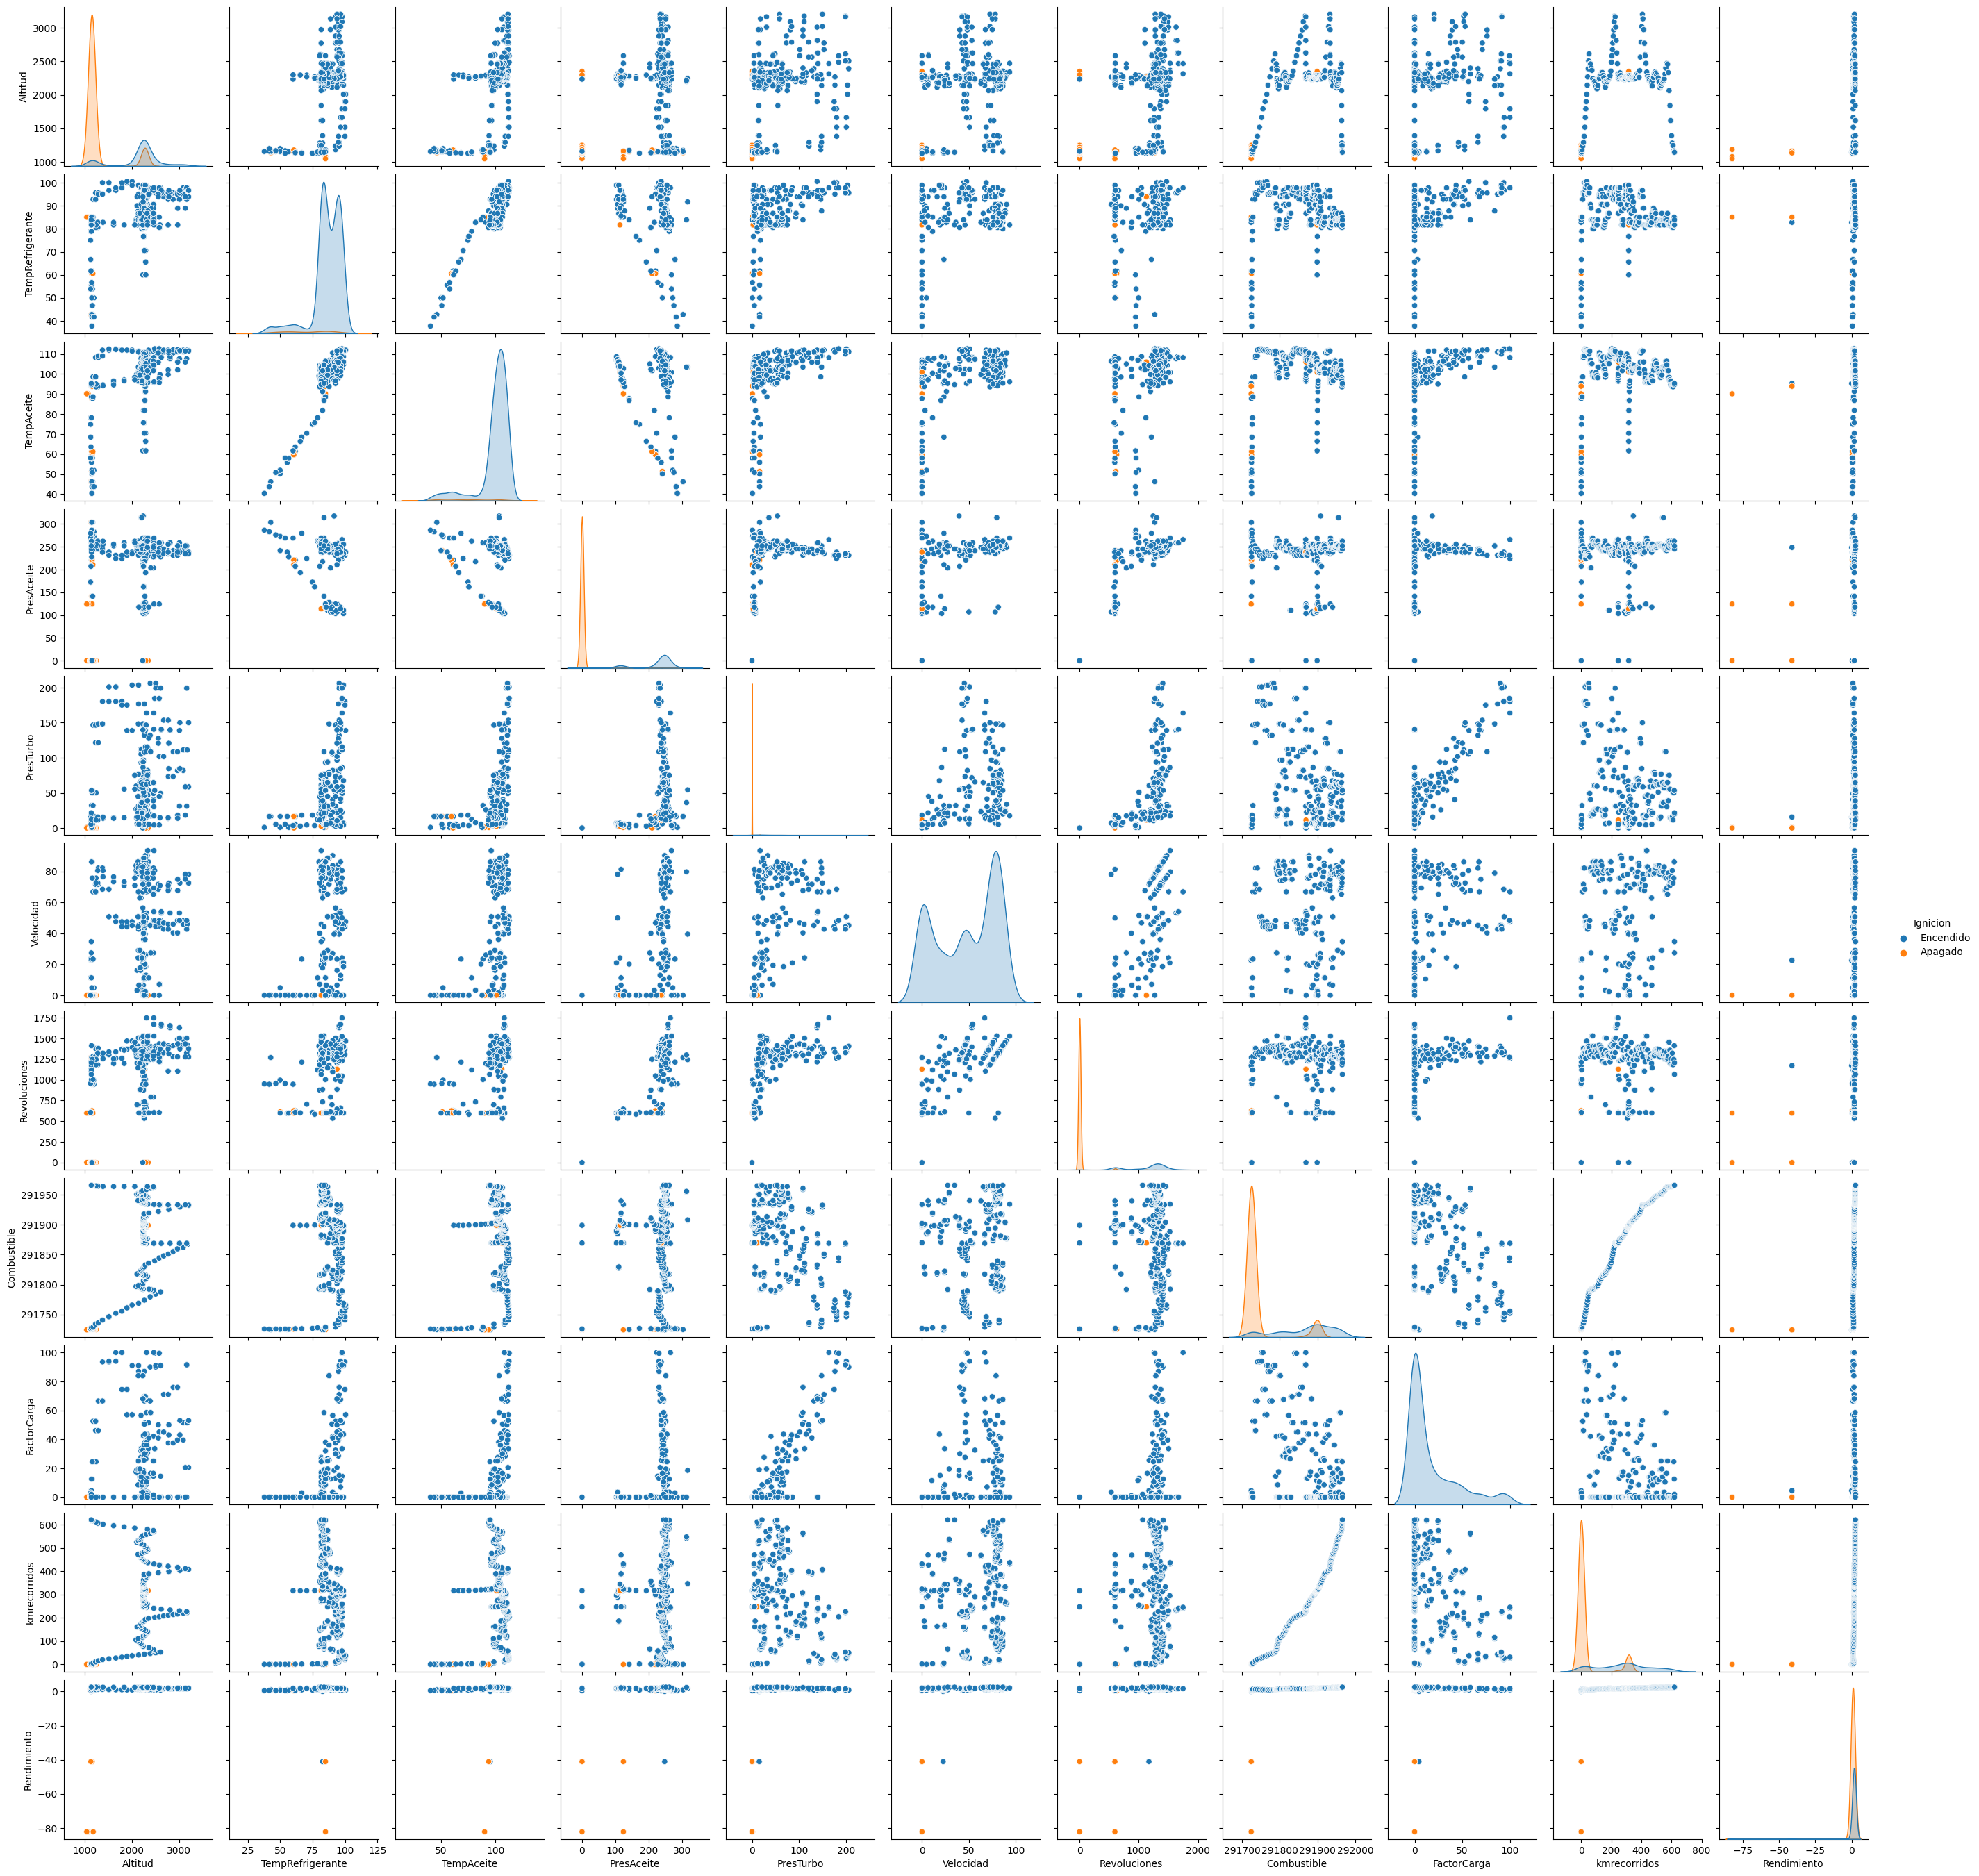

In [33]:
sns.pairplot(reporte, hue="Ignicion")

5. Crear una columna Estado: que utilice la informacion de Velocidad y de Ignición para determinar el estado de operacion 
* A: ignicion apagado y velocidad cero 
* ED: ignicion encendido velocidad cero
* EM: ignicion encendidio velocidad mayo a cero

Se crea la columna Estado con A en los renglones correspondientes y valores vacios en los que no cumplen esa condicion

In [34]:
reporte['Estado'] = (reporte[reporte['Ignicion'] == 'Apagado']['Velocidad'] == 0).to_frame().replace(True, 'A')

In [35]:
reporte.Estado.value_counts()

A    2023
Name: Estado, dtype: int64

In [36]:
reporte.Estado.isnull().sum()

799

Se rellenan los vacios que cumplen la condicion de ED

In [37]:
ed = reporte.loc[(reporte[reporte['Ignicion'] == 'Encendido']['Velocidad'] == 0).to_frame().groupby('Velocidad').get_group(True).index].Estado.fillna('ED')

In [38]:
reporte.Estado.fillna(ed, inplace=True)

In [39]:
reporte.Estado.value_counts()

A     2023
ED     142
Name: Estado, dtype: int64

Se rellenan los vacios que cumplen la condicion de EM

In [40]:
em = reporte.loc[(reporte[reporte['Ignicion'] == 'Encendido']['Velocidad'] > 0).to_frame().groupby('Velocidad').get_group(True).index].Estado.fillna('EM')

In [41]:
reporte.Estado.fillna(em, inplace=True)

In [42]:
reporte.Estado.value_counts()

A     2023
EM     657
ED     142
Name: Estado, dtype: int64

In [43]:
reporte.Estado.isna().sum()

0

In [44]:
reporte

Altitud  TempRefrigerante  TempAceite  PresAceite  \
datetime                                                                 
2016-04-23 21:32:49   1139.5             82.77       95.27      248.40   
2016-04-23 21:33:53   1147.5             82.77       95.27      248.40   
2016-04-23 21:34:53   1147.5             82.77       95.27      248.40   
2016-04-23 21:35:53   1147.5             82.77       95.27      248.40   
2016-04-23 21:36:53   1147.5             85.00       93.88      124.20   
...                      ...               ...         ...         ...   
2016-04-25 20:52:13   1148.3             81.66       94.72      244.95   
2016-04-25 20:53:15   1143.5             81.66       94.72      244.95   
2016-04-25 20:54:15   1143.5             81.66       94.72      244.95   
2016-04-25 20:55:15   1143.5             81.66       94.72      244.95   
2016-04-25 20:56:15   1143.5             83.88       95.27      251.85   

                     PresTurbo  Velocidad  Revoluciones    Combustible  \
datetime                                                                 
2016-04-23 21:32:49     15.516     22.540          1171  291724.366084   
2016-04-23 21:33:53     15.516     22.540          1171  291724.366084   
2016-04-23 21:34:53     15.516     22.540          1171  291724.366084   
2016-04-23 21:35:53     15.516     22.540          1171  291724.366084   
2016-04-23 21:36:53      0.862      0.000           597  291724.366084   
...                        ...        ...           ...            ...   
2016-04-25 20:52:13     19.826     34.615          1065  291966.083552   
2016-04-25 20:53:15     19.826     34.615          1065  291966.083552   
2016-04-25 20:54:15     19.826     34.615          1065  291966.083552   
2016-04-25 20:55:15     19.826     34.615          1065  291966.083552   
2016-04-25 20:56:15     21.550     27.370          1205  291966.083552   

                     FactorCarga                Fecha  kmrecorridos  \
datetime                                                              
2016-04-23 21:32:49          4.5  23/04/2016 21:32:49          0.00   
2016-04-23 21:33:53          4.5  23/04/2016 21:33:53          0.16   
2016-04-23 21:34:53          4.5  23/04/2016 21:34:53          0.16   
2016-04-23 21:35:53          4.5  23/04/2016 21:35:53          0.16   
2016-04-23 21:36:53          0.0  23/04/2016 21:36:53          0.16   
...                          ...                  ...           ...   
2016-04-25 20:52:13          2.0  25/04/2016 20:52:13        618.46   
2016-04-25 20:53:15          2.0  25/04/2016 20:53:15        620.07   
2016-04-25 20:54:15          2.0  25/04/2016 20:54:15        620.07   
2016-04-25 20:55:15          2.0  25/04/2016 20:55:15        620.07   
2016-04-25 20:56:15          0.0  25/04/2016 20:56:15        620.07   

                      Ignicion  Rendimiento   Año Mes Dia Hora Minuto Segundo  \
datetime                                                                        
2016-04-23 21:32:49  Encendido     0.000000  2016  04  23   21     32      49   
2016-04-23 21:33:53  Encendido   -41.100704  2016  04  23   21     33      53   
2016-04-23 21:34:53  Encendido   -41.100704  2016  04  23   21     34      53   
2016-04-23 21:35:53  Encendido   -41.100704  2016  04  23   21     35      53   
2016-04-23 21:36:53  Encendido   -41.100704  2016  04  23   21     36      53   
...                        ...          ...   ...  ..  ..  ...    ...     ...   
2016-04-25 20:52:13  Encendido     2.558687  2016  04  25   20     52      13   
2016-04-25 20:53:15  Encendido     2.565345  2016  04  25   20     53      15   
2016-04-25 20:54:15  Encendido     2.565345  2016  04  25   20     54      15   
2016-04-25 20:55:15  Encendido     2.565345  2016  04  25   20     55      15   
2016-04-25 20:56:15  Encendido     2.565345  2016  04  25   20     56      15   

                    Estado  
datetime                    
2016-04-23 21:32:49     EM  
2016-04-23 21:33:53     EM  
2

6. Determinar la frecuencia de muestreo, es decir cada cuanto se tiene un registro

Se utiliza la función .diff() para obtener la diferencia entre un renglon y el siguiente, esta diferencia es el tiempo entre cada muestra.

In [45]:
pd.to_datetime(reporte.Fecha).diff()

datetime
2016-04-23 21:32:49               NaT
2016-04-23 21:33:53   0 days 00:01:04
2016-04-23 21:34:53   0 days 00:01:00
2016-04-23 21:35:53   0 days 00:01:00
2016-04-23 21:36:53   0 days 00:01:00
                            ...      
2016-04-25 20:52:13   0 days 00:01:00
2016-04-25 20:53:15   0 days 00:01:02
2016-04-25 20:54:15   0 days 00:01:00
2016-04-25 20:55:15   0 days 00:01:00
2016-04-25 20:56:15   0 days 00:01:00
Name: Fecha, Length: 2822, dtype: timedelta64[ns]

Se puede notar que no todas tienen el mismo valor, veamos sus estadisticas

In [46]:
pd.to_datetime(reporte.Fecha).diff().describe()

count                         2821
mean     0 days 00:01:00.477135767
std      0 days 00:00:08.427197090
min                0 days 00:00:41
25%                0 days 00:01:00
50%                0 days 00:01:00
75%                0 days 00:01:00
max                0 days 00:07:58
Name: Fecha, dtype: object

In [47]:
pd.to_datetime(reporte.Fecha).diff().value_counts()

0 days 00:01:00    2155
0 days 00:01:01     107
0 days 00:01:02      65
0 days 00:01:04      40
0 days 00:00:59      35
0 days 00:01:07      33
0 days 00:00:58      33
0 days 00:01:08      30
0 days 00:01:03      30
0 days 00:00:55      29
0 days 00:00:57      27
0 days 00:00:54      24
0 days 00:01:05      23
0 days 00:00:56      23
0 days 00:01:09      23
0 days 00:01:11      22
0 days 00:01:10      20
0 days 00:00:52      20
0 days 00:01:06      19
0 days 00:00:53      16
0 days 00:00:51      11
0 days 00:01:12       5
0 days 00:00:50       4
0 days 00:00:42       3
0 days 00:00:46       3
0 days 00:00:41       2
0 days 00:01:20       2
0 days 00:01:17       2
0 days 00:00:48       2
0 days 00:01:14       2
0 days 00:00:49       2
0 days 00:00:47       1
0 days 00:01:22       1
0 days 00:00:45       1
0 days 00:01:18       1
0 days 00:07:58       1
0 days 00:01:21       1
0 days 00:01:23       1
0 days 00:01:15       1
0 days 00:01:13       1
Name: Fecha, dtype: int64

Se puede notar que no siempre se toman las medidas con la misma frecuencia, sin embargo lo mas comun es tomarlo cada segundo.

7. Identificar valores faltantes, y tratar de determinar porque faltan

In [48]:
reporte.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2822 entries, 2016-04-23 21:32:49 to 2016-04-25 20:56:15
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Altitud           2822 non-null   float64
 1   TempRefrigerante  813 non-null    float64
 2   TempAceite        813 non-null    float64
 3   PresAceite        2822 non-null   float64
 4   PresTurbo         2822 non-null   float64
 5   Velocidad         2822 non-null   float64
 6   Revoluciones      2822 non-null   int64  
 7   Combustible       2822 non-null   float64
 8   FactorCarga       2822 non-null   float64
 9   Fecha             2822 non-null   object 
 10  kmrecorridos      2822 non-null   float64
 11  Ignicion          2822 non-null   object 
 12  Rendimiento       2822 non-null   float64
 13  Año               2822 non-null   object 
 14  Mes               2822 non-null   object 
 15  Dia               2822 non-null   object 
 16  Hora  

In [49]:
reporte.isnull().sum()

Altitud                0
TempRefrigerante    2009
TempAceite          2009
PresAceite             0
PresTurbo              0
Velocidad              0
Revoluciones           0
Combustible            0
FactorCarga            0
Fecha                  0
kmrecorridos           0
Ignicion               0
Rendimiento            0
Año                    0
Mes                    0
Dia                    0
Hora                   0
Minuto                 0
Segundo                0
Estado                 0
dtype: int64

In [50]:
reporte.loc[reporte['TempRefrigerante'].isnull()]

Altitud  TempRefrigerante  TempAceite  PresAceite  \
datetime                                                                 
2016-04-23 21:40:48   1161.5               NaN         NaN         0.0   
2016-04-23 21:41:50   1134.4               NaN         NaN         0.0   
2016-04-23 21:42:50   1134.4               NaN         NaN         0.0   
2016-04-23 21:43:50   1134.4               NaN         NaN         0.0   
2016-04-23 21:44:50   1134.4               NaN         NaN         0.0   
...                      ...               ...         ...         ...   
2016-04-25 15:29:29   2297.4               NaN         NaN         0.0   
2016-04-25 15:30:29   2297.4               NaN         NaN         0.0   
2016-04-25 15:31:30   2234.3               NaN         NaN         0.0   
2016-04-25 15:32:30   2234.3               NaN         NaN         0.0   
2016-04-25 15:33:30   2234.3               NaN         NaN         0.0   

                     PresTurbo  Velocidad  Revoluciones    Combustible  \
datetime                                                                 
2016-04-23 21:40:48        0.0        0.0             0  291724.366084   
2016-04-23 21:41:50        0.0        0.0             0  291724.366084   
2016-04-23 21:42:50        0.0        0.0             0  291724.366084   
2016-04-23 21:43:50        0.0        0.0             0  291724.366084   
2016-04-23 21:44:50        0.0        0.0             0  291724.366084   
...                        ...        ...           ...            ...   
2016-04-25 15:29:29        0.0        0.0             0  291899.138545   
2016-04-25 15:30:29        0.0        0.0             0  291899.138545   
2016-04-25 15:31:30        0.0        0.0             0  291899.138545   
2016-04-25 15:32:30        0.0        0.0             0  291899.138545   
2016-04-25 15:33:30        0.0        0.0             0  291899.138545   

                     FactorCarga                Fecha  kmrecorridos  \
datetime                                                              
2016-04-23 21:40:48          0.0  23/04/2016 21:40:48          0.16   
2016-04-23 21:41:50          0.0  23/04/2016 21:41:50          0.16   
2016-04-23 21:42:50          0.0  23/04/2016 21:42:50          0.16   
2016-04-23 21:43:50          0.0  23/04/2016 21:43:50          0.16   
2016-04-23 21:44:50          0.0  23/04/2016 21:44:50          0.16   
...                          ...                  ...           ...   
2016-04-25 15:29:29          0.0  25/04/2016 15:29:29        316.23   
2016-04-25 15:30:29          0.0  25/04/2016 15:30:29        316.23   
2016-04-25 15:31:30          0.0  25/04/2016 15:31:30        316.23   
2016-04-25 15:32:30          0.0  25/04/2016 15:32:30        316.23   
2016-04-25 15:33:30          0.0  25/04/2016 15:33:30        316.23   

                      Ignicion  Rendimiento   Año Mes Dia Hora Minuto Segundo  \
datetime                                                                        
2016-04-23 21:40:48    Apagado   -41.100704  2016  04  23   21     40      48   
2016-04-23 21:41:50    Apagado   -41.100704  2016  04  23   21     41      50   
2016-04-23 21:42:50    Apagado   -41.100704  2016  04  23   21     42      50   
2016-04-23 21:43:50    Apagado   -41.100704  2016  04  23   21     43      50   
2016-04-23 21:44:50    Apagado   -41.100704  2016  04  23   21     44      50   
...                        ...          ...   ...  ..  ..  ...    ...     ...   
2016-04-25 15:29:29    Apagado     1.809452  2016  04  25   15     29      29   
2016-04-25 15:30:29    Apagado     1.809452  2016  04  25   15     30      29   
2016-04-25 15:31:30    Apagado     1.809452  2016  04  25   15     31      30   
2016-04-25 15:32:30  Encendido     1.809452  2016  04  25   15     32      30   
2016-04-25 15:33:30  Encendido     1.809452  2016  04  25   15     33      30   

                    Estado  
datetime                    
2016-04-23 21:40:48      A  
2016-04-23 21:41:50      A  
2

In [51]:
reporte.loc[reporte['TempRefrigerante'].isnull()]['Estado'].value_counts()

A     1996
ED      13
Name: Estado, dtype: int64

Se puede ver que los valores faltantes en TempRefrigerante son porque el vehiculo esta detenido. Veamos si es cierto en ambas columnas.

In [52]:
reporte.loc[reporte['TempRefrigerante'].isnull()]['Velocidad'] == 0

datetime
2016-04-23 21:40:48    True
2016-04-23 21:41:50    True
2016-04-23 21:42:50    True
2016-04-23 21:43:50    True
2016-04-23 21:44:50    True
                       ... 
2016-04-25 15:29:29    True
2016-04-25 15:30:29    True
2016-04-25 15:31:30    True
2016-04-25 15:32:30    True
2016-04-25 15:33:30    True
Name: Velocidad, Length: 2009, dtype: bool

In [53]:
reporte.loc[reporte['TempAceite'].isnull()]['Velocidad'] == 0


datetime
2016-04-23 21:40:48    True
2016-04-23 21:41:50    True
2016-04-23 21:42:50    True
2016-04-23 21:43:50    True
2016-04-23 21:44:50    True
                       ... 
2016-04-25 15:29:29    True
2016-04-25 15:30:29    True
2016-04-25 15:31:30    True
2016-04-25 15:32:30    True
2016-04-25 15:33:30    True
Name: Velocidad, Length: 2009, dtype: bool

In [54]:
index_missing_values_tr = (reporte.loc[reporte['TempRefrigerante'].isnull()]['Velocidad'] == 0).index
index_missing_values_ta = (reporte.loc[reporte['TempAceite'].isnull()]['Velocidad'] == 0).index
(index_missing_values_ta == index_missing_values_tr).sum()

2009

Los indices de los valores faltantes en las dos columnas son los mismos, por lo que se puede ver que los valores faltantes se debe a que cuando el vehiculo esta parado no se esta sensando la temperatura del refrigerante y el aceite.

8. Rellenar valores faltantes con base en algun criterio razonable derivado de la exploracion de los datos

<AxesSubplot: xlabel='datetime'>

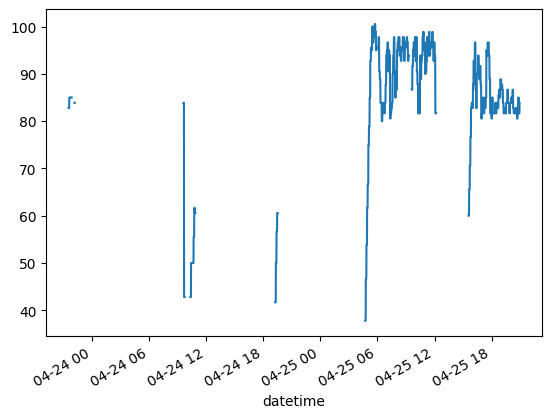

In [55]:
reporte['TempRefrigerante'].plot()

Al estar el vehiculo detenido la temperatura se tendria que mantener constante o bajar. Como se puede ver en la sección faltante entre el 04-24 00 y 04-24 06 la temperatura del ultimo punto y del primero cuando vuelve a sensar es la misma. Mientras que en las otras tres secciones se puede ver que la temperatura disminuye si se comparan el ultimo valor sensado y el nuevo siguiente.

<AxesSubplot: xlabel='datetime'>

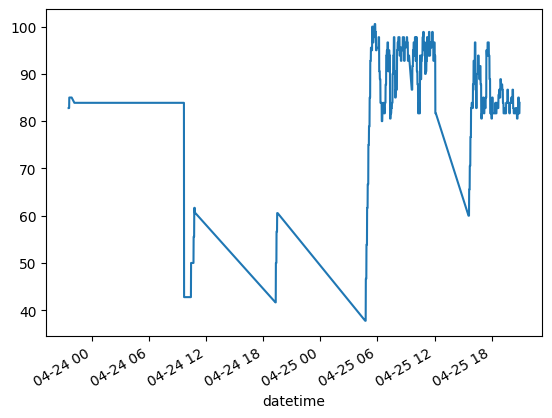

In [56]:
reporte['TempRefrigerante'].dropna().plot()

Al saltar los valores faltantes se puede ver de mejor manera que efectivamente la temperatura se mantiene constante o disminuye.

<AxesSubplot: xlabel='datetime'>

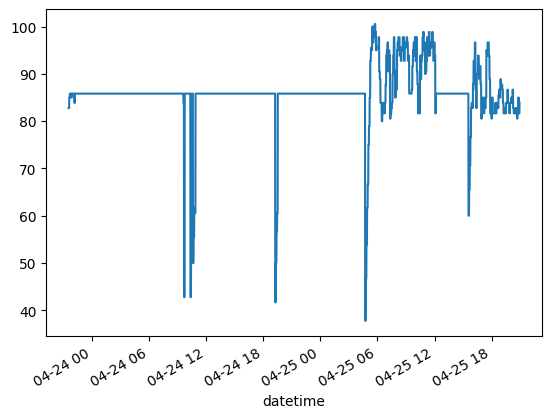

In [57]:
reporte['TempRefrigerante'].fillna(reporte['TempRefrigerante'].mean()).plot()

Si se rellena con el promedio se pierde este comportamiento.

In [58]:
reporte['TempRefrigerante'].fillna(method='ffill').plot()

<AxesSubplot: xlabel='datetime'>

In [59]:
reporte['TempRefrigerante'].fillna(method='bfill').plot()

<AxesSubplot: xlabel='datetime'>

Igualmente se pierden el comportamiento con forward y backwardfill.

<AxesSubplot: xlabel='datetime'>

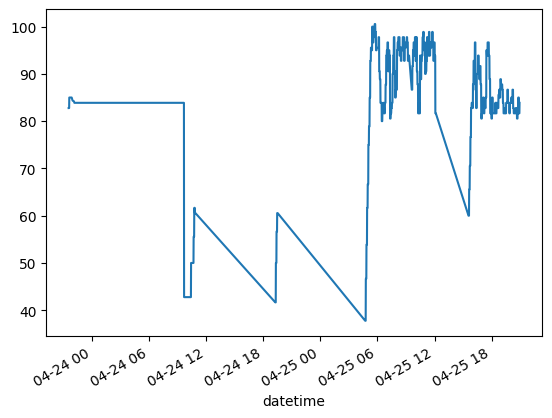

In [60]:
reporte['TempRefrigerante'].interpolate().plot()

Interpolate es la que mejor mantiene el comportamiento de la temperatura permaneciendo constante o disminuyendo.

In [61]:
reporte['TempAceite'].plot()

<AxesSubplot: xlabel='datetime'>

<AxesSubplot: xlabel='datetime'>

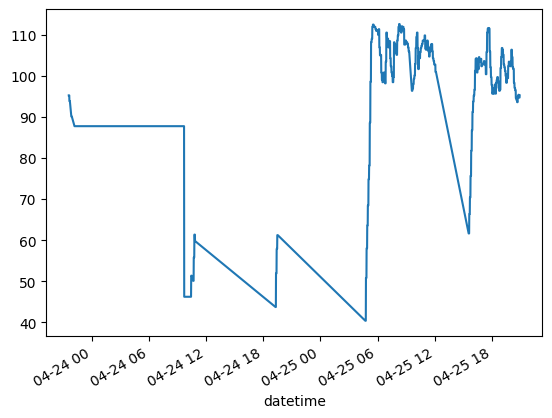

In [62]:
reporte['TempAceite'].dropna().plot()

Se aprecia el mismo comportamiento con la temperatura del aceite por lo que ambos se rellenan con interpolate.

In [63]:
reporte_completo = reporte.interpolate()
reporte_completo.isnull().sum()

Altitud             0
TempRefrigerante    0
TempAceite          0
PresAceite          0
PresTurbo           0
Velocidad           0
Revoluciones        0
Combustible         0
FactorCarga         0
Fecha               0
kmrecorridos        0
Ignicion            0
Rendimiento         0
Año                 0
Mes                 0
Dia                 0
Hora                0
Minuto              0
Segundo             0
Estado              0
dtype: int64

In [64]:
reporte_completo

Altitud  TempRefrigerante  TempAceite  PresAceite  \
datetime                                                                 
2016-04-23 21:32:49   1139.5             82.77       95.27      248.40   
2016-04-23 21:33:53   1147.5             82.77       95.27      248.40   
2016-04-23 21:34:53   1147.5             82.77       95.27      248.40   
2016-04-23 21:35:53   1147.5             82.77       95.27      248.40   
2016-04-23 21:36:53   1147.5             85.00       93.88      124.20   
...                      ...               ...         ...         ...   
2016-04-25 20:52:13   1148.3             81.66       94.72      244.95   
2016-04-25 20:53:15   1143.5             81.66       94.72      244.95   
2016-04-25 20:54:15   1143.5             81.66       94.72      244.95   
2016-04-25 20:55:15   1143.5             81.66       94.72      244.95   
2016-04-25 20:56:15   1143.5             83.88       95.27      251.85   

                     PresTurbo  Velocidad  Revoluciones    Combustible  \
datetime                                                                 
2016-04-23 21:32:49     15.516     22.540          1171  291724.366084   
2016-04-23 21:33:53     15.516     22.540          1171  291724.366084   
2016-04-23 21:34:53     15.516     22.540          1171  291724.366084   
2016-04-23 21:35:53     15.516     22.540          1171  291724.366084   
2016-04-23 21:36:53      0.862      0.000           597  291724.366084   
...                        ...        ...           ...            ...   
2016-04-25 20:52:13     19.826     34.615          1065  291966.083552   
2016-04-25 20:53:15     19.826     34.615          1065  291966.083552   
2016-04-25 20:54:15     19.826     34.615          1065  291966.083552   
2016-04-25 20:55:15     19.826     34.615          1065  291966.083552   
2016-04-25 20:56:15     21.550     27.370          1205  291966.083552   

                     FactorCarga                Fecha  kmrecorridos  \
datetime                                                              
2016-04-23 21:32:49          4.5  23/04/2016 21:32:49          0.00   
2016-04-23 21:33:53          4.5  23/04/2016 21:33:53          0.16   
2016-04-23 21:34:53          4.5  23/04/2016 21:34:53          0.16   
2016-04-23 21:35:53          4.5  23/04/2016 21:35:53          0.16   
2016-04-23 21:36:53          0.0  23/04/2016 21:36:53          0.16   
...                          ...                  ...           ...   
2016-04-25 20:52:13          2.0  25/04/2016 20:52:13        618.46   
2016-04-25 20:53:15          2.0  25/04/2016 20:53:15        620.07   
2016-04-25 20:54:15          2.0  25/04/2016 20:54:15        620.07   
2016-04-25 20:55:15          2.0  25/04/2016 20:55:15        620.07   
2016-04-25 20:56:15          0.0  25/04/2016 20:56:15        620.07   

                      Ignicion  Rendimiento   Año Mes Dia Hora Minuto Segundo  \
datetime                                                                        
2016-04-23 21:32:49  Encendido     0.000000  2016  04  23   21     32      49   
2016-04-23 21:33:53  Encendido   -41.100704  2016  04  23   21     33      53   
2016-04-23 21:34:53  Encendido   -41.100704  2016  04  23   21     34      53   
2016-04-23 21:35:53  Encendido   -41.100704  2016  04  23   21     35      53   
2016-04-23 21:36:53  Encendido   -41.100704  2016  04  23   21     36      53   
...                        ...          ...   ...  ..  ..  ...    ...     ...   
2016-04-25 20:52:13  Encendido     2.558687  2016  04  25   20     52      13   
2016-04-25 20:53:15  Encendido     2.565345  2016  04  25   20     53      15   
2016-04-25 20:54:15  Encendido     2.565345  2016  04  25   20     54      15   
2016-04-25 20:55:15  Encendido     2.565345  2016  04  25   20     55      15   
2016-04-25 20:56:15  Encendido     2.565345  2016  04  25   20     56      15   

                    Estado  
datetime                    
2016-04-23 21:32:49     EM  
2016-04-23 21:33:53     EM  
2

# Ejercicio fallas

1. Homogeneizar los nombre de las columnas (eliminar caracteres especiales, espacios, etc.)
2. Corregir los nombres de las columnas, Unidad <-> Codigo
3. Modificar el indice para que sea la fecha- observar si se pierden datos

In [65]:
fallas

Unidad Código  \
0                 195  T9041   
1   Falla no definida  T9041   
2                 144  T9041   
3                1117  T9041   
4                 123  T9041   
..                ...    ...   
61               2372  T9041   
62                153  T9041   
63                195  T9041   
64                123  T9041   
65               1117  T9041   

                                          Descripción             Fecha  
0   Circuito del Sensor de Nivel de Refrigerante 1...  25/04/2016 15:34  
1   Falla generica frenos.-Vínculo de datos SAE J1...  25/04/2016 15:34  
2   Circuito 1 del Sensor de Temperatura de Refrig...  25/04/2016 15:34  
3   Suministro de Energía Perdido Con Conexión del...  25/04/2016 15:34  
4   Circuito del Sensor de Presión 1 del Múltiple ...  25/04/2016 15:34  
..                                                ...               ...  
61  Presión Diferencial del Filtro de Combustible ...  23/04/2016 21:48  
62  Circuito del Sensor de Temperatura 1 del Múlti...  23/04/2016 21:48  
63  Circuito del Sensor de Nivel de Refrigerante 1...  23/04/2016 21:48  
64  Circuito del Sensor de Presión 1 del Múltiple ...  23/04/2016 21:48  
65  Suministro de Energía Perdido Con Conexión del...  23/04/2016 21:48  

[66 rows x 4 columns]

In [66]:
fallas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unidad       66 non-null     object
 1   Código       66 non-null     object
 2   Descripción  66 non-null     object
 3   Fecha        66 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


1. Homogeneizar los nombre de las columnas (eliminar caracteres especiales, espacios, etc.)

In [67]:
fallas = fallas.set_axis(fallas.columns.str.replace('ó', 'o'), axis=1)
fallas

Unidad Codigo  \
0                 195  T9041   
1   Falla no definida  T9041   
2                 144  T9041   
3                1117  T9041   
4                 123  T9041   
..                ...    ...   
61               2372  T9041   
62                153  T9041   
63                195  T9041   
64                123  T9041   
65               1117  T9041   

                                          Descripcion             Fecha  
0   Circuito del Sensor de Nivel de Refrigerante 1...  25/04/2016 15:34  
1   Falla generica frenos.-Vínculo de datos SAE J1...  25/04/2016 15:34  
2   Circuito 1 del Sensor de Temperatura de Refrig...  25/04/2016 15:34  
3   Suministro de Energía Perdido Con Conexión del...  25/04/2016 15:34  
4   Circuito del Sensor de Presión 1 del Múltiple ...  25/04/2016 15:34  
..                                                ...               ...  
61  Presión Diferencial del Filtro de Combustible ...  23/04/2016 21:48  
62  Circuito del Sensor de Temperatura 1 del Múlti...  23/04/2016 21:48  
63  Circuito del Sensor de Nivel de Refrigerante 1...  23/04/2016 21:48  
64  Circuito del Sensor de Presión 1 del Múltiple ...  23/04/2016 21:48  
65  Suministro de Energía Perdido Con Conexión del...  23/04/2016 21:48  

[66 rows x 4 columns]

2. Corregir los nombres de las columnas, Unidad <-> Codigo2. Corregir los nombres de las columnas, Unidad <-> Codigo

In [68]:
fallas = fallas.rename(columns={fallas.columns[0]: fallas.columns[1], fallas.columns[1]: fallas.columns[0]})
fallas

Codigo Unidad  \
0                 195  T9041   
1   Falla no definida  T9041   
2                 144  T9041   
3                1117  T9041   
4                 123  T9041   
..                ...    ...   
61               2372  T9041   
62                153  T9041   
63                195  T9041   
64                123  T9041   
65               1117  T9041   

                                          Descripcion             Fecha  
0   Circuito del Sensor de Nivel de Refrigerante 1...  25/04/2016 15:34  
1   Falla generica frenos.-Vínculo de datos SAE J1...  25/04/2016 15:34  
2   Circuito 1 del Sensor de Temperatura de Refrig...  25/04/2016 15:34  
3   Suministro de Energía Perdido Con Conexión del...  25/04/2016 15:34  
4   Circuito del Sensor de Presión 1 del Múltiple ...  25/04/2016 15:34  
..                                                ...               ...  
61  Presión Diferencial del Filtro de Combustible ...  23/04/2016 21:48  
62  Circuito del Sensor de Temperatura 1 del Múlti...  23/04/2016 21:48  
63  Circuito del Sensor de Nivel de Refrigerante 1...  23/04/2016 21:48  
64  Circuito del Sensor de Presión 1 del Múltiple ...  23/04/2016 21:48  
65  Suministro de Energía Perdido Con Conexión del...  23/04/2016 21:48  

[66 rows x 4 columns]

3. Modificar el indice para que sea la fecha- observar si se pierden datos

In [69]:
fallas['datetime'] = pd.to_datetime(fallas.Fecha)
fallas

Codigo Unidad  \
0                 195  T9041   
1   Falla no definida  T9041   
2                 144  T9041   
3                1117  T9041   
4                 123  T9041   
..                ...    ...   
61               2372  T9041   
62                153  T9041   
63                195  T9041   
64                123  T9041   
65               1117  T9041   

                                          Descripcion             Fecha  \
0   Circuito del Sensor de Nivel de Refrigerante 1...  25/04/2016 15:34   
1   Falla generica frenos.-Vínculo de datos SAE J1...  25/04/2016 15:34   
2   Circuito 1 del Sensor de Temperatura de Refrig...  25/04/2016 15:34   
3   Suministro de Energía Perdido Con Conexión del...  25/04/2016 15:34   
4   Circuito del Sensor de Presión 1 del Múltiple ...  25/04/2016 15:34   
..                                                ...               ...   
61  Presión Diferencial del Filtro de Combustible ...  23/04/2016 21:48   
62  Circuito del Sensor de Temperatura 1 del Múlti...  23/04/2016 21:48   
63  Circuito del Sensor de Nivel de Refrigerante 1...  23/04/2016 21:48   
64  Circuito del Sensor de Presión 1 del Múltiple ...  23/04/2016 21:48   
65  Suministro de Energía Perdido Con Conexión del...  23/04/2016 21:48   

              datetime  
0  2016-04-25 15:34:00  
1  2016-04-25 15:34:00  
2  2016-04-25 15:34:00  
3  2016-04-25 15:34:00  
4  2016-04-25 15:34:00  
..                 ...  
61 2016-04-23 21:48:00  
62 2016-04-23 21:48:00  
63 2016-04-23 21:48:00  
64 2016-04-23 21:48:00  
65 2016-04-23 21:48:00  

[66 rows x 5 columns]

In [70]:
fallas.set_index('datetime', inplace=True)
fallas

Codigo Unidad  \
datetime                                        
2016-04-25 15:34:00                195  T9041   
2016-04-25 15:34:00  Falla no definida  T9041   
2016-04-25 15:34:00                144  T9041   
2016-04-25 15:34:00               1117  T9041   
2016-04-25 15:34:00                123  T9041   
...                                ...    ...   
2016-04-23 21:48:00               2372  T9041   
2016-04-23 21:48:00                153  T9041   
2016-04-23 21:48:00                195  T9041   
2016-04-23 21:48:00                123  T9041   
2016-04-23 21:48:00               1117  T9041   

                                                           Descripcion  \
datetime                                                                 
2016-04-25 15:34:00  Circuito del Sensor de Nivel de Refrigerante 1...   
2016-04-25 15:34:00  Falla generica frenos.-Vínculo de datos SAE J1...   
2016-04-25 15:34:00  Circuito 1 del Sensor de Temperatura de Refrig...   
2016-04-25 15:34:00  Suministro de Energía Perdido Con Conexión del...   
2016-04-25 15:34:00  Circuito del Sensor de Presión 1 del Múltiple ...   
...                                                                ...   
2016-04-23 21:48:00  Presión Diferencial del Filtro de Combustible ...   
2016-04-23 21:48:00  Circuito del Sensor de Temperatura 1 del Múlti...   
2016-04-23 21:48:00  Circuito del Sensor de Nivel de Refrigerante 1...   
2016-04-23 21:48:00  Circuito del Sensor de Presión 1 del Múltiple ...   
2016-04-23 21:48:00  Suministro de Energía Perdido Con Conexión del...   

                                Fecha  
datetime                               
2016-04-25 15:34:00  25/04/2016 15:34  
2016-04-25 15:34:00  25/04/2016 15:34  
2016-04-25 15:34:00  25/04/2016 15:34  
2016-04-25 15:34:00  25/04/2016 15:34  
2016-04-25 15:34:00  25/04/2016 15:34  
...                               ...  
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48  

[66 rows x 4 columns]

In [71]:
fallas.loc['2016-04-23 21:48']

Codigo Unidad  \
datetime                                        
2016-04-23 21:48:00  Falla no definida  T9041   
2016-04-23 21:48:00                144  T9041   
2016-04-23 21:48:00               2372  T9041   
2016-04-23 21:48:00                153  T9041   
2016-04-23 21:48:00                195  T9041   
2016-04-23 21:48:00                123  T9041   
2016-04-23 21:48:00               1117  T9041   

                                                           Descripcion  \
datetime                                                                 
2016-04-23 21:48:00  Falla generica frenos.-Vínculo de datos SAE J1...   
2016-04-23 21:48:00  Circuito 1 del Sensor de Temperatura de Refrig...   
2016-04-23 21:48:00  Presión Diferencial del Filtro de Combustible ...   
2016-04-23 21:48:00  Circuito del Sensor de Temperatura 1 del Múlti...   
2016-04-23 21:48:00  Circuito del Sensor de Nivel de Refrigerante 1...   
2016-04-23 21:48:00  Circuito del Sensor de Presión 1 del Múltiple ...   
2016-04-23 21:48:00  Suministro de Energía Perdido Con Conexión del...   

                                Fecha  
datetime                               
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48  
2016-04-23 21:48:00  23/04/2016 21:48

No se pierde pierde información, se mantienen los 66 renglones y al llamar por una fecha y hora especifica regresa todos los renglones que ocurrieron al mismo tiempo.